# n fastest horses

Given n_horses and a track that can hold n_track horses, how many races are needed to determine the n_fastest horses?

In [1]:
from random import shuffle
from math import ceil, floor
import numpy as np
import operator
from matplotlib import pyplot as plt

In [2]:
# define input parameters for simulations

n_horses = 25
n_fastest = 5
n_track = 5
n_iterations = 100 # number of times to run the simulation

In [3]:
# function to populate the horses in order of speed

def fastest_horses_list(n_horses):
    horse_list = [x for x in range(1, n_horses + 1)]
    shuffle(horse_list)
    return(horse_list)

In [4]:
# function to assign race outcomes to a dictionary of lists that represent slower horses

def build_results_dict(n_horses, race_outcomes):
    results_dict = dict()
    for horse in range(1, n_horses + 1):
        results_dict[horse] = []
        for race in race_outcomes:
            for i, horse2 in enumerate(race):
                if horse == horse2:
                    if i > 0:
                        #print(i, horse)
                        results_dict[horse].append(race[i - 1])
                        #print(i, horse, horse2, race[i + 1])
    return results_dict

In [5]:
# create a function that takes in a horse and a dict of race results,
# and returns a list of known faster horses

def find_faster_horses(horse, race_results):
    #print('Horse in function call: ')
    #print(horse)
    faster = []
    faster_horses = race_results[horse]
    faster.extend(faster_horses)
    #print('Faster horses before recursion for horse %u: ' % horse)
    #print(faster)
    if len(faster_horses) > 0:
        for faster_horse in faster_horses:
            #print('Faster horse for recursive call, in call for horse %u: ' % horse)
            #print(faster_horse)
            faster.extend(find_faster_horses(faster_horse, race_results))
    #print('Faster horses after recusive call of horse %u: ' % horse)
    #print(faster)
    return list(dict.fromkeys(faster))

In [6]:
# define a function to determine whether horses are the nth fastest

def determine_n_fastest_horses(n_fastest, n_faster):
    is_fastest = {i:False for i in n_faster.keys()}
    for i in range(n_fastest):
        k = 0
        for j in is_fastest.keys():
            if n_faster[j] == i:
                k += 1
                good = j
        if k == 1:
            is_fastest[good] = i + 1
    return is_fastest

In [7]:
# define a function to determine which horses are out of the running for the top n and unknown

def determine_unknown_and_not_fastest(n_faster, n_fastest, is_fastest):
    is_not_fastest = {i:False for i in n_faster.keys()}
    is_unknown = {i:True for i in n_faster.keys()}
    for i in is_not_fastest.keys():
        if n_faster[i] >= n_fastest:
            is_not_fastest[i] = True
        is_unknown[i] = is_fastest[i] == False and is_not_fastest[i] == False
    return is_unknown, is_not_fastest


In [8]:
# define a function to identify the horses with the minimum number of faster horses

def find_min_faster(n_faster, n_track, is_unknown):
    min_faster = []
    k = 0
    temp = [item[0] for item in sorted(n_faster.items(), key=operator.itemgetter(1))]
    print(temp)
    while len(min_faster) < n_track and k < max(n_faster.keys()):
        if is_unknown[temp[k]]:
            min_faster.append(temp[k])
        k += 1
    return min_faster

In [9]:
# MASTER CELL TO RUN SIMULATION


n_races_list = []
for _ in range(n_iterations):
    # create the horse order
    horse_list = fastest_horses_list(n_horses)
    
    # run initial hardcoded races
    
    # assign horses to 1st n_horses/n_track races to divvy up the pool of horses intially
    n_races = ceil(n_horses/n_track)
    
    # run the first set of races
    race_outcomes = []
    for i in range(0, n_horses, n_track):
        race_outcomes.append(sorted(horse_list[i:(i + n_track)]))
        
    # conduct the next race of all of the winners from the first races
    winners = []
    for race in race_outcomes:
        winners.append(race[0])
    race_outcomes.append(sorted(winners))
    n_races += 1
    
    # make the results dictionary from these initial races
    results_dict = build_results_dict(n_horses, race_outcomes)

    # compute the faster horses for each horse, and identify horses that must be or not in the fastest group
    faster_dict = {}
    n_faster = {}
    for i in results_dict.keys():
        faster_dict[i] = find_faster_horses(i, results_dict)
        n_faster[i] = len(faster_dict[i])
    
    # determine which horses are known to be fastest and are out of the running
    is_fastest = determine_n_fastest_horses(n_fastest, n_faster)
    is_unknown, is_not_fastest = determine_unknown_and_not_fastest(n_faster, n_fastest, is_fastest)
    
    # print stuff
    
    print('\n\nRESULTS AFTER RACE %u!!!\n\n' % n_races)
    print('\nRace outcomes:')
    print(race_outcomes)
    print('\nResults dictionary:')
    print(results_dict)
    print('\nFaster horses dictionary:')
    print(faster_dict)
    print('\nn_faster horses dictionary:')
    print(n_faster)
    print('\nis_fastest dictionary:')
    print(is_fastest)
    print('\nis_not_fastest dictionary:')
    print(is_not_fastest)
    print('\nis_unknown_dictionary:')
    print(is_unknown)

    # run as many additional races as needed to identify the n fastest 
    # by always choosing those horses with the fewest known faster horses for the next race

    while True:
        print('\n\nSTARTING RACE %u!!!\n' % (n_races + 1))
        
        # identify the n_track horses with the fewest known faster horses
        min_faster = find_min_faster(n_faster, n_track, is_unknown)
        print('\nMin faster:')
        print(min_faster)
        
        # run the race
        race_outcomes.append(sorted(min_faster))
        n_races += 1
        
        # recompute the results dictionary
        results_dict = build_results_dict(n_horses, race_outcomes)
        
        # compute the faster horses for each horse, and identify horses that must be or not in the fastest group
        faster_dict = {}
        n_faster = {}
        for i in results_dict.keys():
            faster_dict[i] = find_faster_horses(i, results_dict)
            n_faster[i] = len(faster_dict[i])
        
        # determine which horses are known to be fastest and are out of the running
        is_fastest = determine_n_fastest_horses(n_fastest, n_faster)
        is_unknown, is_not_fastest = determine_unknown_and_not_fastest(n_faster, n_fastest, is_fastest)
    
        # print stuff
        print('\n\nRESULTS AFTER RACE %u!!!\n\n' % n_races)
        print('\nRace outcomes:')
        print(race_outcomes)
        print('\nResults dictionary:')
        print(results_dict)
        print('\nFaster horses dictionary:')
        print(faster_dict)
        print('\nn_faster horses dictionary:')
        print(n_faster)
        print('\nis_fastest dictionary:')
        print(is_fastest)
        print('\nis_not_fastest dictionary:')
        print(is_not_fastest)
        print('\nis_unknown_dictionary:')
        print(is_unknown)
        
        if sum(is_not_fastest.values()) == n_horses - n_fastest:
            print("\n\nSOLVED in %u races!" % n_races)
            break
        else: 
            print("\n\nNot solved after %u races: %u horses identified, %u horses remain to sort out." % (
                n_races, sum(is_fastest.values()), sum(is_unknown.values())))
    
    n_races_list.append(n_races)




RESULTS AFTER RACE 6!!!



Race outcomes:
[[5, 6, 15, 19, 22], [2, 4, 11, 12, 18], [8, 10, 16, 21, 24], [1, 3, 7, 13, 25], [9, 14, 17, 20, 23], [1, 2, 5, 8, 9]]

Results dictionary:
{1: [], 2: [1], 3: [1], 4: [2], 5: [2], 6: [5], 7: [3], 8: [5], 9: [8], 10: [8], 11: [4], 12: [11], 13: [7], 14: [9], 15: [6], 16: [10], 17: [14], 18: [12], 19: [15], 20: [17], 21: [16], 22: [19], 23: [20], 24: [21], 25: [13]}

Faster horses dictionary:
{1: [], 2: [1], 3: [1], 4: [2, 1], 5: [2, 1], 6: [5, 2, 1], 7: [3, 1], 8: [5, 2, 1], 9: [8, 5, 2, 1], 10: [8, 5, 2, 1], 11: [4, 2, 1], 12: [11, 4, 2, 1], 13: [7, 3, 1], 14: [9, 8, 5, 2, 1], 15: [6, 5, 2, 1], 16: [10, 8, 5, 2, 1], 17: [14, 9, 8, 5, 2, 1], 18: [12, 11, 4, 2, 1], 19: [15, 6, 5, 2, 1], 20: [17, 14, 9, 8, 5, 2, 1], 21: [16, 10, 8, 5, 2, 1], 22: [19, 15, 6, 5, 2, 1], 23: [20, 17, 14, 9, 8, 5, 2, 1], 24: [21, 16, 10, 8, 5, 2, 1], 25: [13, 7, 3, 1]}

n_faster horses dictionary:
{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 2, 8: 3, 9: 4, 10: 4, 11: 3, 1

Race outcomes:
[[2, 3, 12, 13, 14], [1, 10, 15, 16, 20], [6, 9, 19, 24, 25], [5, 11, 17, 18, 23], [4, 7, 8, 21, 22], [1, 2, 4, 5, 6]]

Results dictionary:
{1: [], 2: [1], 3: [2], 4: [2], 5: [4], 6: [5], 7: [4], 8: [7], 9: [6], 10: [1], 11: [5], 12: [3], 13: [12], 14: [13], 15: [10], 16: [15], 17: [11], 18: [17], 19: [9], 20: [16], 21: [8], 22: [21], 23: [18], 24: [19], 25: [24]}

Faster horses dictionary:
{1: [], 2: [1], 3: [2, 1], 4: [2, 1], 5: [4, 2, 1], 6: [5, 4, 2, 1], 7: [4, 2, 1], 8: [7, 4, 2, 1], 9: [6, 5, 4, 2, 1], 10: [1], 11: [5, 4, 2, 1], 12: [3, 2, 1], 13: [12, 3, 2, 1], 14: [13, 12, 3, 2, 1], 15: [10, 1], 16: [15, 10, 1], 17: [11, 5, 4, 2, 1], 18: [17, 11, 5, 4, 2, 1], 19: [9, 6, 5, 4, 2, 1], 20: [16, 15, 10, 1], 21: [8, 7, 4, 2, 1], 22: [21, 8, 7, 4, 2, 1], 23: [18, 17, 11, 5, 4, 2, 1], 24: [19, 9, 6, 5, 4, 2, 1], 25: [24, 19, 9, 6, 5, 4, 2, 1]}

n_faster horses dictionary:
{1: 0, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 3, 8: 4, 9: 5, 10: 1, 11: 4, 12: 3, 13: 4, 14: 5, 15: 2, 16

[[4, 8, 12, 18, 22], [13, 15, 16, 21, 23], [1, 9, 10, 19, 24], [2, 3, 5, 7, 14], [6, 11, 17, 20, 25], [1, 2, 4, 6, 13]]

Results dictionary:
{1: [], 2: [1], 3: [2], 4: [2], 5: [3], 6: [4], 7: [5], 8: [4], 9: [1], 10: [9], 11: [6], 12: [8], 13: [6], 14: [7], 15: [13], 16: [15], 17: [11], 18: [12], 19: [10], 20: [17], 21: [16], 22: [18], 23: [21], 24: [19], 25: [20]}

Faster horses dictionary:
{1: [], 2: [1], 3: [2, 1], 4: [2, 1], 5: [3, 2, 1], 6: [4, 2, 1], 7: [5, 3, 2, 1], 8: [4, 2, 1], 9: [1], 10: [9, 1], 11: [6, 4, 2, 1], 12: [8, 4, 2, 1], 13: [6, 4, 2, 1], 14: [7, 5, 3, 2, 1], 15: [13, 6, 4, 2, 1], 16: [15, 13, 6, 4, 2, 1], 17: [11, 6, 4, 2, 1], 18: [12, 8, 4, 2, 1], 19: [10, 9, 1], 20: [17, 11, 6, 4, 2, 1], 21: [16, 15, 13, 6, 4, 2, 1], 22: [18, 12, 8, 4, 2, 1], 23: [21, 16, 15, 13, 6, 4, 2, 1], 24: [19, 10, 9, 1], 25: [20, 17, 11, 6, 4, 2, 1]}

n_faster horses dictionary:
{1: 0, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 4, 8: 3, 9: 1, 10: 2, 11: 4, 12: 4, 13: 4, 14: 5, 15: 5, 16: 6, 17: 5,

Race outcomes:
[[1, 5, 12, 14, 24], [4, 10, 15, 23, 25], [6, 9, 16, 19, 22], [7, 13, 17, 20, 21], [2, 3, 8, 11, 18], [1, 2, 4, 6, 7], [2, 3, 4, 5, 12]]

Results dictionary:
{1: [], 2: [1], 3: [2, 2], 4: [2, 3], 5: [1, 4], 6: [4], 7: [6], 8: [3], 9: [6], 10: [4], 11: [8], 12: [5, 5], 13: [7], 14: [12], 15: [10], 16: [9], 17: [13], 18: [11], 19: [16], 20: [17], 21: [20], 22: [19], 23: [15], 24: [14], 25: [23]}

Faster horses dictionary:
{1: [], 2: [1], 3: [2, 1], 4: [2, 3, 1], 5: [1, 4, 2, 3], 6: [4, 2, 3, 1], 7: [6, 4, 2, 3, 1], 8: [3, 2, 1], 9: [6, 4, 2, 3, 1], 10: [4, 2, 3, 1], 11: [8, 3, 2, 1], 12: [5, 1, 4, 2, 3], 13: [7, 6, 4, 2, 3, 1], 14: [12, 5, 1, 4, 2, 3], 15: [10, 4, 2, 3, 1], 16: [9, 6, 4, 2, 3, 1], 17: [13, 7, 6, 4, 2, 3, 1], 18: [11, 8, 3, 2, 1], 19: [16, 9, 6, 4, 2, 3, 1], 20: [17, 13, 7, 6, 4, 2, 3, 1], 21: [20, 17, 13, 7, 6, 4, 2, 3, 1], 22: [19, 16, 9, 6, 4, 2, 3, 1], 23: [15, 10, 4, 2, 3, 1], 24: [14, 12, 5, 1, 4, 2, 3], 25: [23, 15, 10, 4, 2, 3, 1]}

n_faster horses 

{1: [], 2: [1], 3: [2, 1], 4: [1], 5: [2, 1], 6: [5, 2, 1], 7: [4, 1], 8: [6, 5, 2, 1], 9: [3, 2, 1], 10: [5, 2, 1], 11: [10, 5, 2, 1], 12: [10, 5, 2, 1], 13: [8, 6, 5, 2, 1], 14: [12, 10, 5, 2, 1], 15: [14, 12, 10, 5, 2, 1], 16: [7, 4, 1], 17: [11, 10, 5, 2, 1], 18: [16, 7, 4, 1], 19: [17, 11, 10, 5, 2, 1], 20: [19, 17, 11, 10, 5, 2, 1], 21: [15, 14, 12, 10, 5, 2, 1], 22: [21, 15, 14, 12, 10, 5, 2, 1], 23: [9, 3, 2, 1], 24: [13, 8, 6, 5, 2, 1], 25: [23, 9, 3, 2, 1]}

n_faster horses dictionary:
{1: 0, 2: 1, 3: 2, 4: 1, 5: 2, 6: 3, 7: 2, 8: 4, 9: 3, 10: 3, 11: 4, 12: 4, 13: 5, 14: 5, 15: 6, 16: 3, 17: 5, 18: 4, 19: 6, 20: 7, 21: 7, 22: 8, 23: 4, 24: 6, 25: 5}

is_fastest dictionary:
{1: 1, 2: False, 3: False, 4: False, 5: False, 6: False, 7: False, 8: False, 9: False, 10: False, 11: False, 12: False, 13: False, 14: False, 15: False, 16: False, 17: False, 18: False, 19: False, 20: False, 21: False, 22: False, 23: False, 24: False, 25: False}

is_not_fastest dictionary:
{1: False, 2: Fal

{1: [], 2: [1], 3: [2], 4: [3], 5: [2], 6: [1], 7: [6], 8: [3], 9: [7], 10: [8], 11: [5], 12: [4], 13: [4], 14: [13], 15: [11], 16: [12], 17: [14], 18: [17], 19: [10], 20: [16], 21: [20], 22: [19], 23: [18], 24: [15], 25: [9]}

Faster horses dictionary:
{1: [], 2: [1], 3: [2, 1], 4: [3, 2, 1], 5: [2, 1], 6: [1], 7: [6, 1], 8: [3, 2, 1], 9: [7, 6, 1], 10: [8, 3, 2, 1], 11: [5, 2, 1], 12: [4, 3, 2, 1], 13: [4, 3, 2, 1], 14: [13, 4, 3, 2, 1], 15: [11, 5, 2, 1], 16: [12, 4, 3, 2, 1], 17: [14, 13, 4, 3, 2, 1], 18: [17, 14, 13, 4, 3, 2, 1], 19: [10, 8, 3, 2, 1], 20: [16, 12, 4, 3, 2, 1], 21: [20, 16, 12, 4, 3, 2, 1], 22: [19, 10, 8, 3, 2, 1], 23: [18, 17, 14, 13, 4, 3, 2, 1], 24: [15, 11, 5, 2, 1], 25: [9, 7, 6, 1]}

n_faster horses dictionary:
{1: 0, 2: 1, 3: 2, 4: 3, 5: 2, 6: 1, 7: 2, 8: 3, 9: 3, 10: 4, 11: 3, 12: 4, 13: 4, 14: 5, 15: 4, 16: 5, 17: 6, 18: 7, 19: 5, 20: 6, 21: 7, 22: 6, 23: 8, 24: 5, 25: 4}

is_fastest dictionary:
{1: 1, 2: False, 3: False, 4: False, 5: False, 6: False, 7: 



STARTING RACE 7!!!

[1, 2, 7, 3, 5, 14, 4, 6, 10, 18, 8, 9, 12, 15, 20, 11, 13, 17, 19, 16, 22, 24, 21, 25, 23]

Min faster:
[2, 7, 3, 5, 14]


RESULTS AFTER RACE 7!!!



Race outcomes:
[[4, 12, 13, 22, 25], [3, 6, 8, 19, 24], [2, 5, 10, 15, 17], [1, 7, 14, 18, 20], [9, 11, 16, 21, 23], [1, 2, 3, 4, 9], [2, 3, 5, 7, 14]]

Results dictionary:
{1: [], 2: [1], 3: [2, 2], 4: [3], 5: [2, 3], 6: [3], 7: [1, 5], 8: [6], 9: [4], 10: [5], 11: [9], 12: [4], 13: [12], 14: [7, 7], 15: [10], 16: [11], 17: [15], 18: [14], 19: [8], 20: [18], 21: [16], 22: [13], 23: [21], 24: [19], 25: [22]}

Faster horses dictionary:
{1: [], 2: [1], 3: [2, 1], 4: [3, 2, 1], 5: [2, 3, 1], 6: [3, 2, 1], 7: [1, 5, 2, 3], 8: [6, 3, 2, 1], 9: [4, 3, 2, 1], 10: [5, 2, 3, 1], 11: [9, 4, 3, 2, 1], 12: [4, 3, 2, 1], 13: [12, 4, 3, 2, 1], 14: [7, 1, 5, 2, 3], 15: [10, 5, 2, 3, 1], 16: [11, 9, 4, 3, 2, 1], 17: [15, 10, 5, 2, 3, 1], 18: [14, 7, 1, 5, 2, 3], 19: [8, 6, 3, 2, 1], 20: [18, 14, 7, 1, 5, 2, 3], 21: [16, 11, 9, 4, 3



Race outcomes:
[[8, 19, 21, 22, 25], [1, 2, 4, 6, 13], [7, 9, 11, 23, 24], [3, 12, 15, 17, 18], [5, 10, 14, 16, 20], [1, 3, 5, 7, 8]]

Results dictionary:
{1: [], 2: [1], 3: [1], 4: [2], 5: [3], 6: [4], 7: [5], 8: [7], 9: [7], 10: [5], 11: [9], 12: [3], 13: [6], 14: [10], 15: [12], 16: [14], 17: [15], 18: [17], 19: [8], 20: [16], 21: [19], 22: [21], 23: [11], 24: [23], 25: [22]}

Faster horses dictionary:
{1: [], 2: [1], 3: [1], 4: [2, 1], 5: [3, 1], 6: [4, 2, 1], 7: [5, 3, 1], 8: [7, 5, 3, 1], 9: [7, 5, 3, 1], 10: [5, 3, 1], 11: [9, 7, 5, 3, 1], 12: [3, 1], 13: [6, 4, 2, 1], 14: [10, 5, 3, 1], 15: [12, 3, 1], 16: [14, 10, 5, 3, 1], 17: [15, 12, 3, 1], 18: [17, 15, 12, 3, 1], 19: [8, 7, 5, 3, 1], 20: [16, 14, 10, 5, 3, 1], 21: [19, 8, 7, 5, 3, 1], 22: [21, 19, 8, 7, 5, 3, 1], 23: [11, 9, 7, 5, 3, 1], 24: [23, 11, 9, 7, 5, 3, 1], 25: [22, 21, 19, 8, 7, 5, 3, 1]}

n_faster horses dictionary:
{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4, 10: 3, 11: 5, 12: 2, 13: 4, 14: 4, 15: 3

In [10]:
print(n_races_list)

[8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 9, 8, 8, 9, 8, 8, 8, 9, 8, 9, 9, 8, 8, 8, 9, 8, 9, 8, 9, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 9, 9, 8, 9, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 9, 8, 9, 9, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 9, 8, 8, 8, 9, 9, 8, 8, 9, 9, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


(array([71.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ]),
 <a list of 10 Patch objects>)

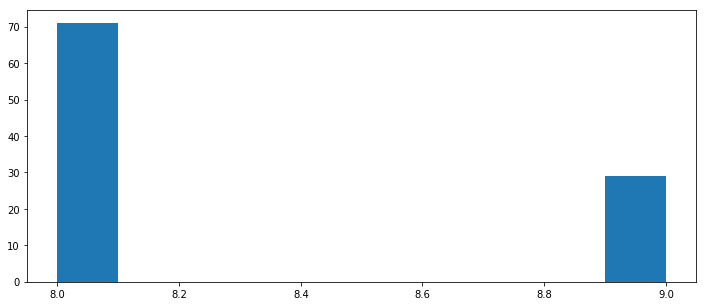

In [11]:
fig = plt.figure()
fig.set_size_inches([12,5])
ax = fig.subplots()
ax.hist(n_races_list)